In [6]:
import numpy as np
import matplotlib.pyplot as plt

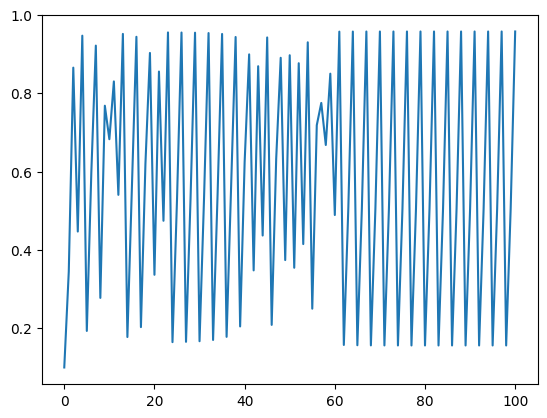

In [17]:
# Simulation parameters
#
# Control parameter of the map: A period-3 cycle
r = 3.83
# Set up an array of iterates and set the initital condition
x = [0.1]
# The number of iterations to generate
N = 100

# The main loop that generates iterates and stores them
for n in range(0, N):
    # at each iteration calculate x_n+1
    # and append to list x
    x.append(r*x[n]*(1.-x[n]))
    

plt.plot(np.arange(0, N+1), x)
plt.show()